In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
plt.style.use('seaborn')
plt.style.use('dark_background')

In [4]:
df = pd.read_csv('data.csv')
df.shape

(42000, 785)

In [5]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
print(type(data))

<class 'numpy.ndarray'>


In [7]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [8]:
 X = data[:, 1:]
 Y = data[:, 0]

In [9]:
split = int(0.8*X.shape[0])
print(split)

33600


In [10]:
X_train = X[:split, :]
X_test = X[split:, :]
Y_train = Y[:split]
Y_test = Y[split:]

In [11]:
#visualizing the data
def drawImage(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.show()

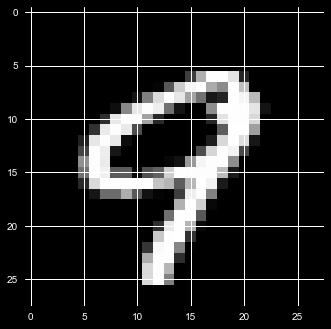

In [12]:
drawImage(X_train[100])

In [13]:
def dist(x1, x2):
    return np.sqrt(sum((x1-x2)**2))

In [14]:
def knn(X, Y, queryPt, k = 5):
    vals = []
    m = X.shape[0]
    for i in range(m):
        d = dist(X[i, :], queryPt)
        vals.append((d, Y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    newVals = np.unique(vals[:, 1], return_counts=True)
    index = newVals[1].argmax()
    pred = newVals[0][index]
    return pred

7


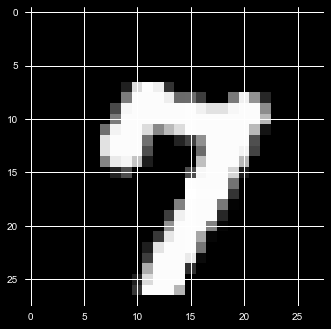

7


In [15]:
pred = knn(X_train, Y_train, X_test[1], 100)
print(int(pred))
drawImage(X_test[1])
print(Y_test[1])

In [16]:
def findAccuracy(n):
    correct = 0
    wrong = 0
    for i in range(n):
        pred = knn(X_train, Y_train, X_test[i], 100)
        if pred == Y_test[i]:
            correct += 1
        else:
            wrong += 1
            print("i: ", i)
            print("prediction: ", int(pred))
            drawImage(X_test[i])
    accuracy = (correct/(correct + wrong))*100
    return accuracy

wrong predictions: 
i:  8
prediction:  0


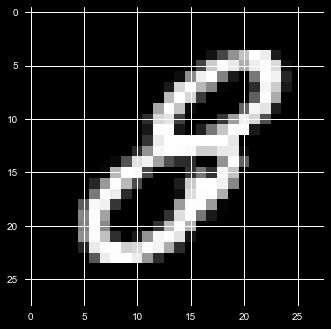

i:  22
prediction:  3


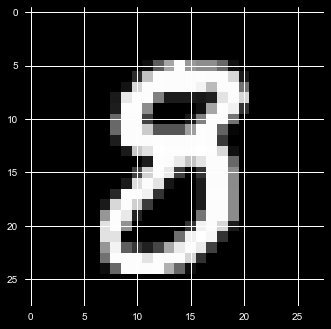

i:  25
prediction:  1


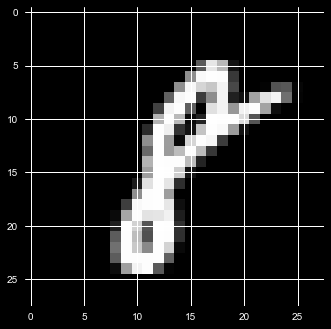

i:  27
prediction:  7


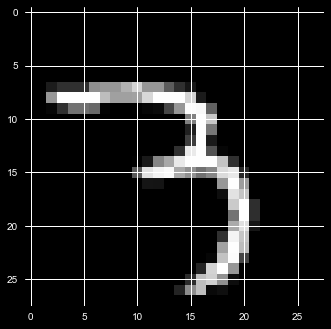

i:  31
prediction:  1


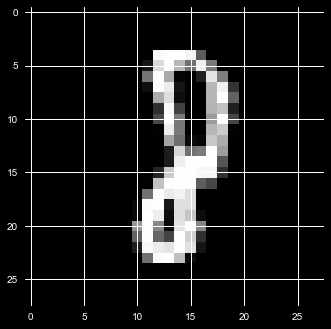

i:  55
prediction:  9


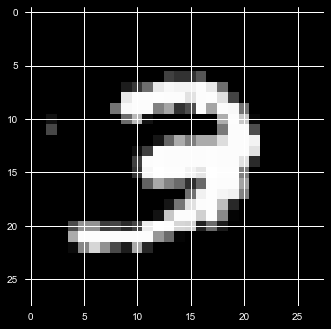

i:  74
prediction:  3


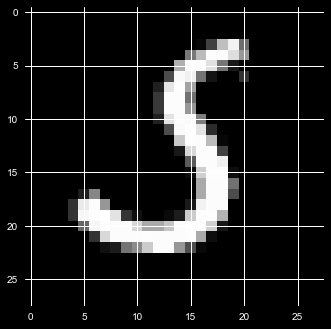

i:  81
prediction:  5


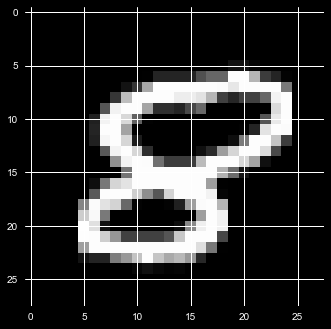

i:  84
prediction:  1


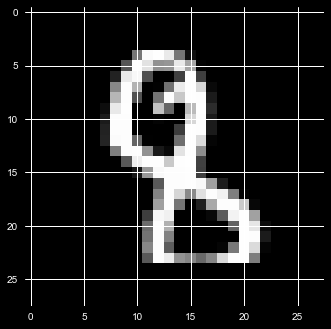

i:  89
prediction:  6


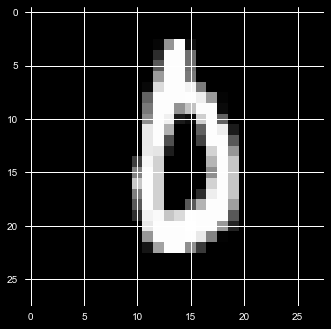

i:  95
prediction:  0


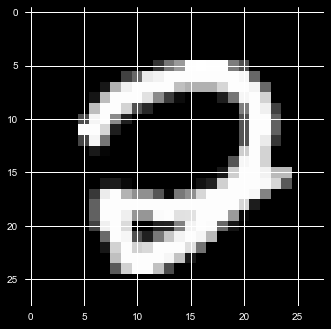

accuracy base on 100 samples:  89.0
time taken:  876.6432640552521


In [16]:
startTime = time.time()
print("wrong predictions: ")
accuracy = findAccuracy(100)
print("accuracy base on 100 samples, with k = 100: ", accuracy)
print("time taken: ", time.time() - startTime)

In [17]:
def findAccuracy1(n, k):
    correct = 0
    wrong = 0
    for i in range(n):
        pred = knn(X_train, Y_train, X_test[i], k)
        if pred == Y_test[i]:
            correct += 1
        else:
            wrong += 1
            print("i: ", i)
            print("prediction: ", int(pred))
            drawImage(X_test[i])
    accuracy = (correct/(correct + wrong))*100
    return accuracy

wrong predictions: 
i:  8
prediction:  5


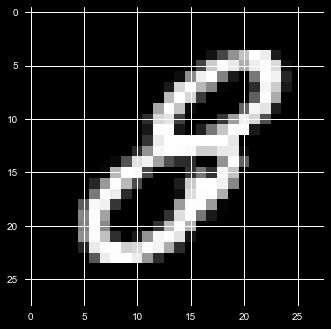

i:  12
prediction:  7


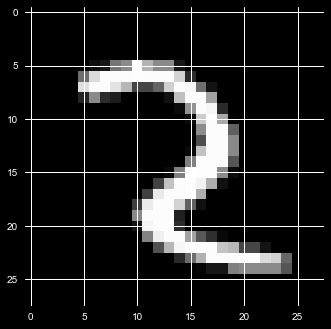

i:  18
prediction:  3


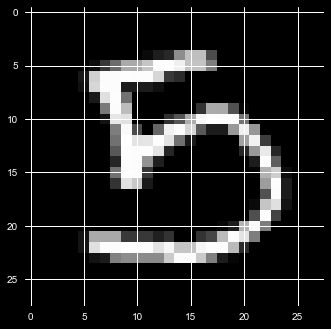

i:  22
prediction:  3


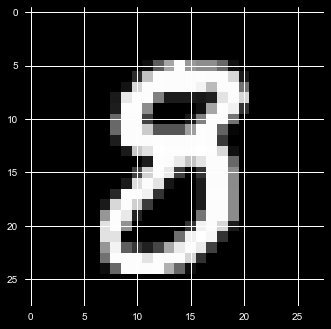

i:  25
prediction:  1


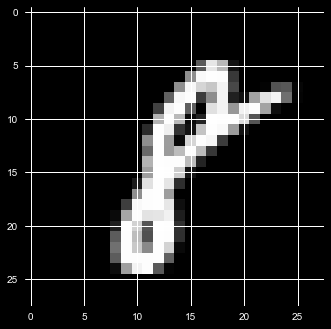

i:  27
prediction:  1


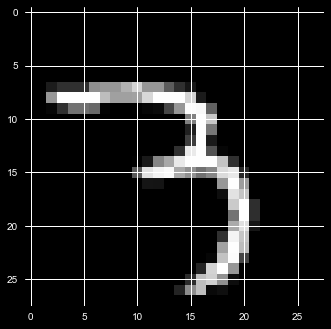

i:  31
prediction:  1


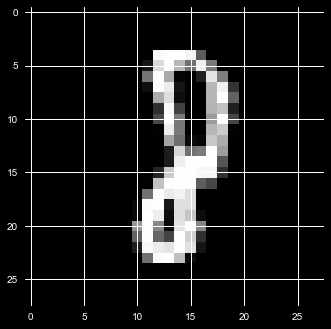

i:  39
prediction:  1


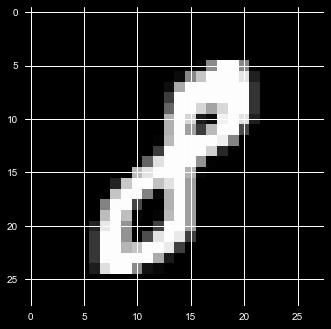

i:  47
prediction:  9


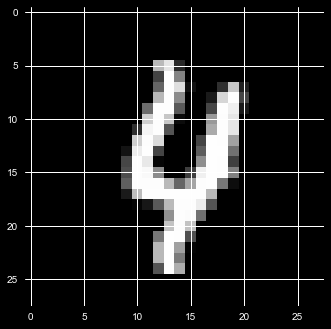

i:  55
prediction:  9


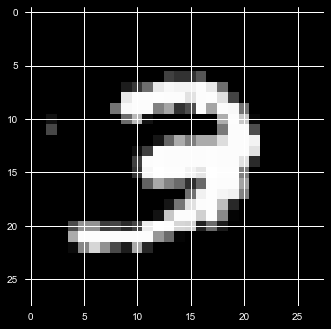

i:  56
prediction:  9


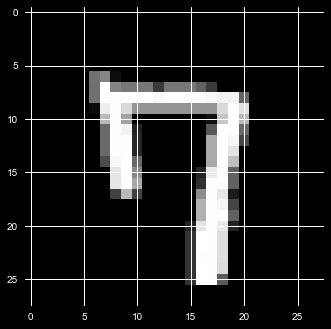

i:  74
prediction:  3


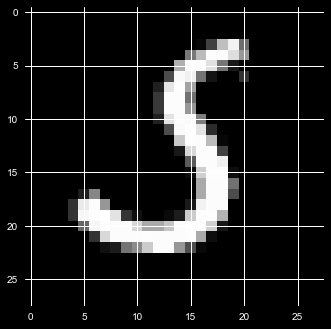

i:  81
prediction:  9


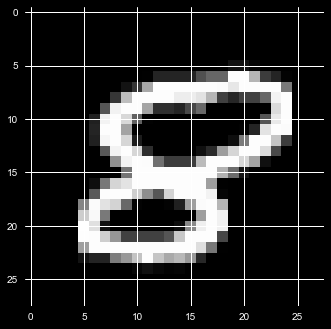

i:  84
prediction:  1


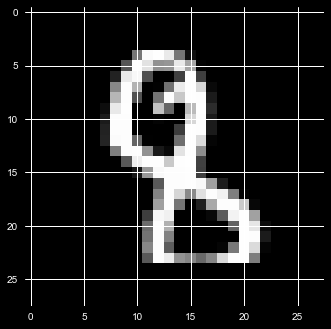

i:  89
prediction:  6


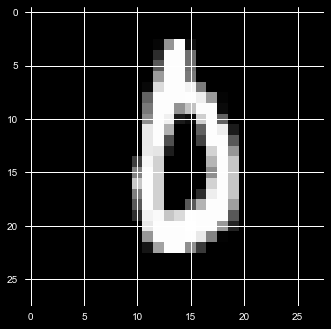

i:  95
prediction:  0


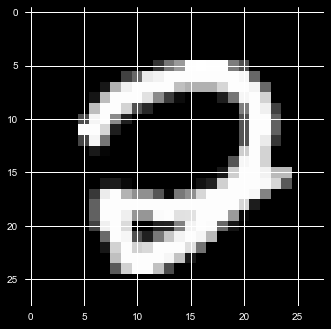

accuracy base on 100 samples, with k = 1000:  84.0
time taken:  738.5596730709076


In [18]:
startTime = time.time()
print("wrong predictions: ")
accuracy = findAccuracy1(100, 1000)
print("accuracy base on 100 samples, with k = 1000: ", accuracy)
print("time taken: ", time.time() - startTime)

wrong predictions: 
i:  8
prediction:  0


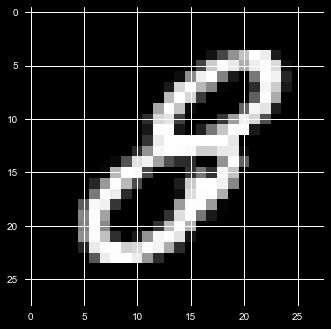

i:  27
prediction:  7


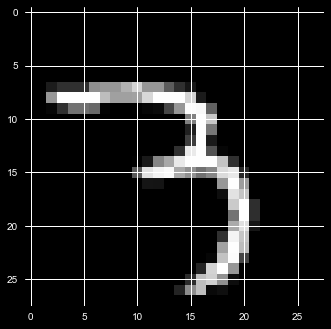

i:  95
prediction:  0


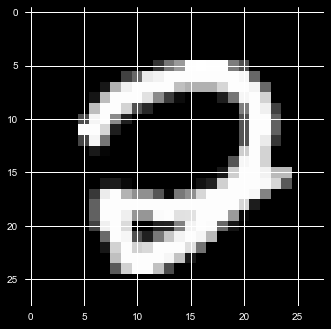

accuracy base on 100 samples, with k = 15:  97.0
time taken:  738.1153869628906


In [19]:
startTime = time.time()
print("wrong predictions: ")
accuracy = findAccuracy1(100, 15)
print("accuracy base on 100 samples, with k = 15: ", accuracy)
print("time taken: ", time.time() - startTime)